In [1]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [2]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [3]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [4]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
conn = engine.connect()

In [5]:
import numpy as np
import pandas as pd

In [6]:
import datetime as dt
from dateutil.parser import parse
import pandas as pd

# Reflect Tables into SQLAlchemy ORM

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results


# Use Pandas Plotting with Matplotlib to plot the data


In [11]:
inspector = inspect(engine)

In [12]:
inspector.get_table_names()

['measurement', 'station']

In [13]:
columns = inspector.get_columns('Measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [14]:
columns = inspector.get_columns('Station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Part 1

# Precipitation Analysis

In [15]:
# Calculate the date 1 year ago from the last data point in the database

In [16]:
last_date= session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(last_date)

('2017-08-23',)


In [17]:
type(last_date)

sqlalchemy.util._collections.result

In [18]:
last_date=dt.datetime(2017, 8, 23)

In [19]:
year_ago = last_date - dt.timedelta(days=365)
year_ago

datetime.datetime(2016, 8, 23, 0, 0)

In [20]:
# Perform a query to retrieve the data and precipitation scores


In [21]:
last_year=session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > '2016-08-23').\
    filter(Measurement.date < '2017-08-23').\
    order_by(Measurement.date).all()

In [22]:
#Number of observations in the last year
len(last_year)

2219

In [23]:
# Save the query results as a Pandas DataFrame and set the index to the date column

In [24]:
precip = pd.DataFrame(last_year, columns=['date', 'prcp'])
precip.set_index('date', inplace=True, )
precip


,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22
...,...
2017-08-21,NaN
2017-08-21,0.56
2017-08-22,0.00


In [25]:
type(precip)

pandas.core.frame.DataFrame

In [26]:
precip.shape

(2219, 1)

In [27]:
# Sort the dataframe by date
precip.dtypes

prcp    float64
dtype: object

In [28]:
# Use Pandas to calcualte the summary statistics for the precipitation data
#Replace NaN values with 0, then drop 0 rows 
precip['prcp'] = precip['prcp'].fillna(1000)
precip.drop(precip[precip['prcp']==1000].index, inplace=True)


In [29]:
precip.size

1088

In [30]:
precip.sort_index(axis = 0)
precip.head(10)

,prcp
date,
2016-08-25,0.08
2016-08-25,0.08
2016-08-25,0.00
2016-08-25,0.00
2016-08-25,0.21
2016-08-25,0.06
2016-08-25,0.11
2016-08-26,0.00
2016-08-26,0.03


In [31]:
# Use Pandas Plotting with Matplotlib to plot the data for average daily precipitation

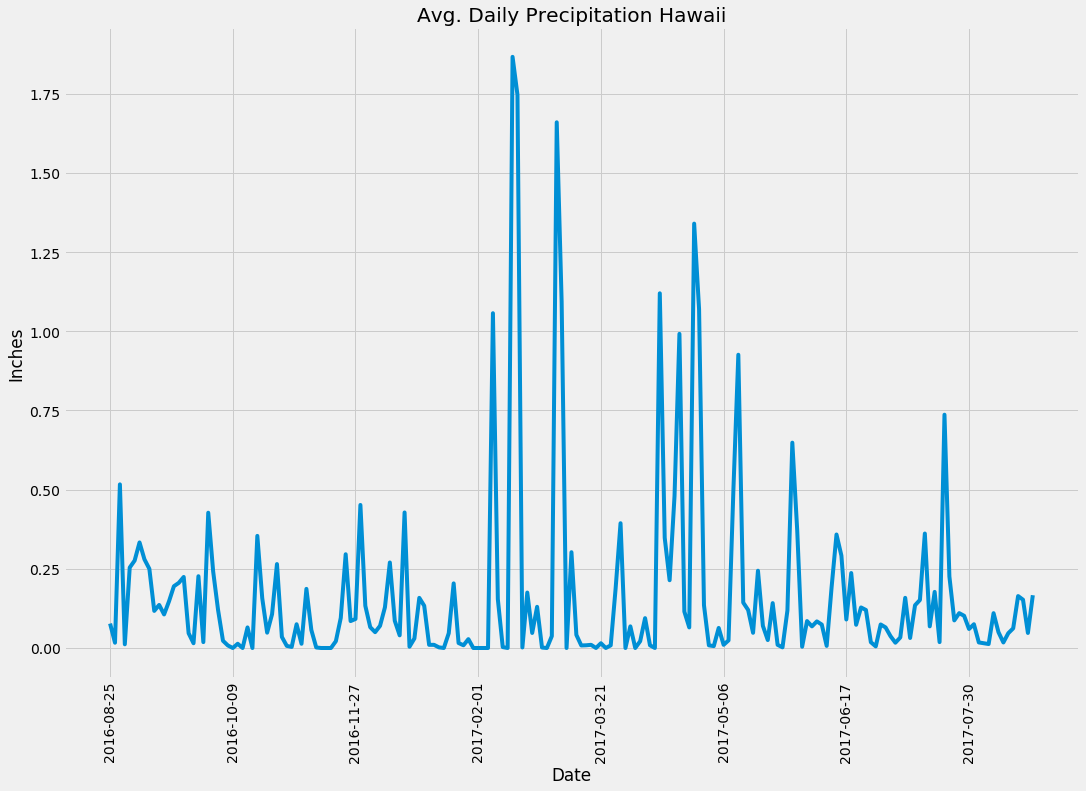

In [32]:
precip_chart_data=precip.groupby('date').agg({'prcp': ['mean']}).reset_index()
precip_chart=precip_chart_data.plot.line(x='date', y='prcp', figsize=(15, 10))
precip_chart.get_legend().remove()
plt.tight_layout()
plt.grid()
plt.xticks(rotation=90)
plt.title("Avg. Daily Precipitation Hawaii")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.grid()


In [33]:
#Afterwards create summary statistics for precipitation.
precip.reset_index().agg({'prcp': ['count', 'mean', 'min','max', 'median', 'sum']})

,prcp
count,1088.000000
mean,0.175818
min,0.000000
max,6.250000
median,0.020000
sum,191.290000


# Station Analysis

In [34]:
station_extract=session.query(Station.station, Station.name).\
    order_by(Station.name).all()

In [35]:
#station_extract= pd.read_sql("SELECT DISTINCT * FROM Station", conn)
for record in station_extract:
    print(record)

('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US')
('USC00513117', 'KANEOHE 838.1, HI US')
('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US')
('USC00516128', 'MANOA LYON ARBO 785.2, HI US')
('USC00517948', 'PEARL CITY, HI US')
('USC00518838', 'UPPER WAHIAWA 874.3, HI US')
('USC00519281', 'WAIHEE 837.5, HI US')
('USC00519397', 'WAIKIKI 717.2, HI US')
('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US')


In [36]:
# Design a query to show how many stations are available in this dataset?
#station_list=station_extract.station.unique()
#len(station_list)


In [37]:
station_count=session.query(func.count(Station.name)).\
   distinct().scalar()
print(station_count)

9


In [38]:
station_data=pd.DataFrame(session.query(Station.name, Station.station, Measurement.date, Measurement.tobs).\
    filter(Measurement.station == Station.station).\
    #filter(Measurement.date > '2016-08-23').\
    #filter(Measurement.date < '2017-08-23').\
    order_by(Measurement.date.desc()).all())
station_data

,name,station,date,tobs
0,"WAIKIKI 717.2, HI US",USC00519397,2017-08-23,81.0
1,"KUALOA RANCH HEADQUARTERS 886.9, HI US",USC00514830,2017-08-23,82.0
2,"WAIMANALO EXPERIMENTAL FARM, HI US",USC00519523,2017-08-23,82.0
3,"MANOA LYON ARBO 785.2, HI US",USC00516128,2017-08-23,76.0
4,"WAIKIKI 717.2, HI US",USC00519397,2017-08-22,82.0
...,...,...,...,...
19545,"UPPER WAHIAWA 874.3, HI US",USC00518838,2010-01-01,72.0
19546,"WAIMANALO EXPERIMENTAL FARM, HI US",USC00519523,2010-01-01,75.0
19547,"WAIHEE 837.5, HI US",USC00519281,2010-01-01,70.0
19548,"HONOLULU OBSERVATORY 702.2, HI US",USC00511918,2010-01-01,66.0


In [39]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_summary=station_data.groupby('name').agg({'tobs': ['count', 'mean', 'min','max', 'median']})
station_summary.columns = ['count', 'mean', 'min','max', 'median']
station_summary=station_summary.reset_index()
station_summary.sort_values('count', inplace=True, ascending=False)
station_summary

,name,count,mean,min,max,median
6,"WAIHEE 837.5, HI US",2772,71.663781,54.0,85.0,72.0
7,"WAIKIKI 717.2, HI US",2724,74.553231,56.0,87.0,76.0
1,"KANEOHE 838.1, HI US",2709,72.689184,59.0,85.0,73.0
8,"WAIMANALO EXPERIMENTAL FARM, HI US",2669,74.543649,56.0,85.0,75.0
3,"MANOA LYON ARBO 785.2, HI US",2612,70.915008,58.0,84.0,71.0
2,"KUALOA RANCH HEADQUARTERS 886.9, HI US",2202,74.873297,58.0,85.0,75.0
0,"HONOLULU OBSERVATORY 702.2, HI US",1979,71.615968,53.0,87.0,72.0
4,"PEARL CITY, HI US",1372,74.684402,58.0,87.0,75.0
5,"UPPER WAHIAWA 874.3, HI US",511,72.724070,58.0,83.0,73.0


In [40]:
    station_data1=session.query(Station.station).\
    filter(Measurement.station == Station.station).\
    group_by(Station.station).\
    order_by(func.count(Measurement.tobs).desc()).first()
    
    #Find station with most observations, by sorting in descending order, putting into list and takin gfirst element from list
    filter_set=list(station_data1)
    #tuples_filtered = [tup for tup in tuples if tup[0] in filter_set]
    #tuples_filtered
    max_station=str(filter_set[0])
    max_station
    type(max_station)

str

In [41]:
   
    station_data2=session.query(Station.name, Station.station, Measurement.date, Measurement.tobs).\
    filter(Measurement.station == Station.station).\
    filter(Measurement.station == max_station).\
    filter(Measurement.date > '2016-08-23').\
    filter(Measurement.date < '2017-08-23').\
    order_by(Measurement.date.desc()).all()
    station_data2

[('WAIHEE 837.5, HI US', 'USC00519281', '2017-08-18', 79.0),
 ('WAIHEE 837.5, HI US', 'USC00519281', '2017-08-17', 76.0),
 ('WAIHEE 837.5, HI US', 'USC00519281', '2017-08-16', 76.0),
 ('WAIHEE 837.5, HI US', 'USC00519281', '2017-08-15', 77.0),
 ('WAIHEE 837.5, HI US', 'USC00519281', '2017-08-14', 77.0),
 ('WAIHEE 837.5, HI US', 'USC00519281', '2017-08-13', 77.0),
 ('WAIHEE 837.5, HI US', 'USC00519281', '2017-08-06', 83.0),
 ('WAIHEE 837.5, HI US', 'USC00519281', '2017-08-05', 82.0),
 ('WAIHEE 837.5, HI US', 'USC00519281', '2017-08-04', 77.0),
 ('WAIHEE 837.5, HI US', 'USC00519281', '2017-07-31', 76.0),
 ('WAIHEE 837.5, HI US', 'USC00519281', '2017-07-30', 81.0),
 ('WAIHEE 837.5, HI US', 'USC00519281', '2017-07-29', 82.0),
 ('WAIHEE 837.5, HI US', 'USC00519281', '2017-07-28', 81.0),
 ('WAIHEE 837.5, HI US', 'USC00519281', '2017-07-27', 76.0),
 ('WAIHEE 837.5, HI US', 'USC00519281', '2017-07-26', 75.0),
 ('WAIHEE 837.5, HI US', 'USC00519281', '2017-07-25', 77.0),
 ('WAIHEE 837.5, HI US',

In [42]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
main_station=station_summary.nlargest(1, 'count').reset_index()
main_station

,index,name,count,mean,min,max,median
0,6,"WAIHEE 837.5, HI US",2772,71.663781,54.0,85.0,72.0


In [43]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_name=main_station.at[0,'name']
station_name

'WAIHEE 837.5, HI US'

In [44]:
type(station_name)

str

In [45]:
tobs_main_station = station_data[station_data.name == station_name]
tobs_main_station=tobs_main_station.reset_index()
tobs_main_station

,index,name,station,date,tobs
0,20,"WAIHEE 837.5, HI US",USC00519281,2017-08-18,79.0
1,24,"WAIHEE 837.5, HI US",USC00519281,2017-08-17,76.0
2,28,"WAIHEE 837.5, HI US",USC00519281,2017-08-16,76.0
3,33,"WAIHEE 837.5, HI US",USC00519281,2017-08-15,77.0
4,38,"WAIHEE 837.5, HI US",USC00519281,2017-08-14,77.0
...,...,...,...,...,...
2767,19519,"WAIHEE 837.5, HI US",USC00519281,2010-01-05,74.0
2768,19526,"WAIHEE 837.5, HI US",USC00519281,2010-01-04,75.0
2769,19533,"WAIHEE 837.5, HI US",USC00519281,2010-01-03,74.0
2770,19540,"WAIHEE 837.5, HI US",USC00519281,2010-01-02,62.0


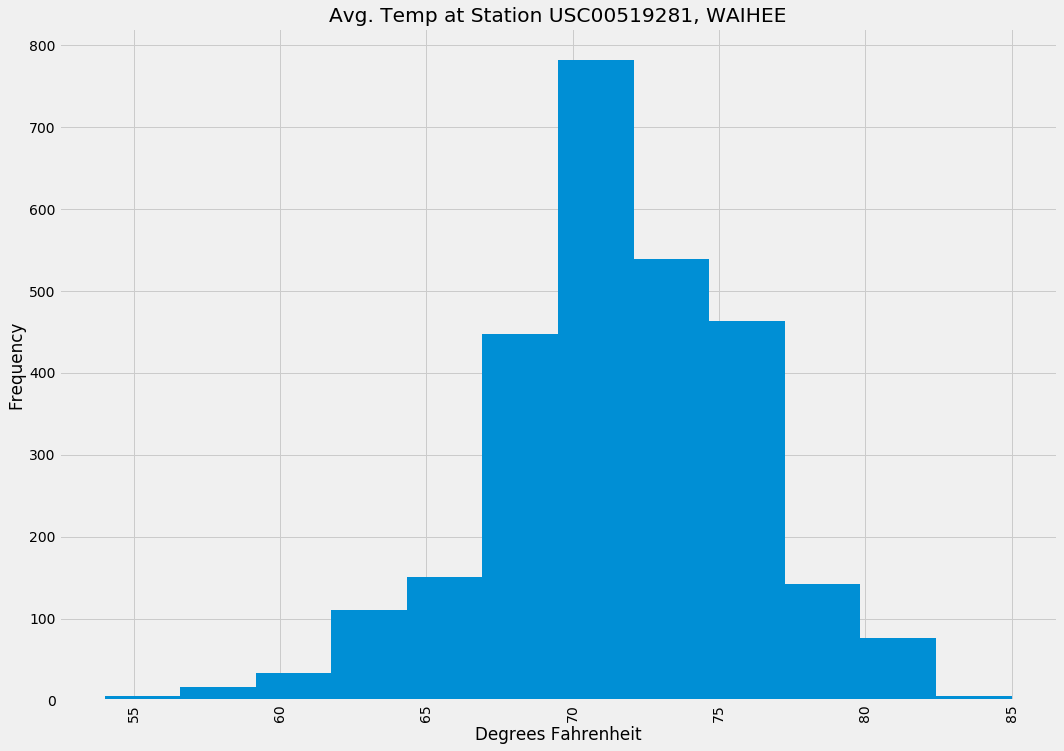

In [46]:
tobs_chart=tobs_main_station.plot.hist(x='date', y='tobs', figsize=(15, 10), bins=12)
tobs_chart.get_legend().remove()
plt.tight_layout()
plt.grid()
plt.xticks(rotation=90)
plt.title("Avg. Temp at Station USC00519281, WAIHEE")
plt.xlabel("Degrees Fahrenheit")
plt.ylabel("Frequency")
plt.grid()